## 1. Introduction
<p><img src="https://assets.datacamp.com/production/project_1197/img/google_play_store.png" alt="Google Play logo"></p>
<p>Mobile apps are everywhere. They are easy to create and can be very lucrative from the business standpoint. Specifically, Android is expanding as an operating system and has captured more than 74% of the total market<sup><a href="https://www.statista.com/statistics/272698/global-market-share-held-by-mobile-operating-systems-since-2009">[1]</a></sup>. </p>
<p>The Google Play Store apps data has enormous potential to facilitate data-driven decisions and insights for businesses. In this notebook, we will analyze the Android app market by comparing ~10k apps in Google Play across different categories. We will also use the user reviews to draw a qualitative comparision between the apps.</p>
<p>The dataset you will use here was scraped from Google Play Store in September 2018 and was published on <a href="https://www.kaggle.com/lava18/google-play-store-apps">Kaggle</a>. Here are the details: <br>
<br></p>
<div style="background-color: #efebe4; color: #05192d; text-align:left; vertical-align: middle; padding: 15px 25px 15px 25px; line-height: 1.6;">
    <div style="font-size:20px"><b>datasets/apps.csv</b></div>
This file contains all the details of the apps on Google Play. There are 9 features that describe a given app.
<ul>
    <li><b>App:</b> Name of the app</li>
    <li><b>Category:</b> Category of the app. Some examples are: ART_AND_DESIGN, FINANCE, COMICS, BEAUTY etc.</li>
    <li><b>Rating:</b> The current average rating (out of 5) of the app on Google Play</li>
    <li><b>Reviews:</b> Number of user reviews given on the app</li>
    <li><b>Size:</b> Size of the app in MB (megabytes)</li>
    <li><b>Installs:</b> Number of times the app was downloaded from Google Play</li>
    <li><b>Type:</b> Whether the app is paid or free</li>
    <li><b>Price:</b> Price of the app in US$</li>
    <li><b>Last Updated:</b> Date on which the app was last updated on Google Play </li>

</ul>
</div>
<div style="background-color: #efebe4; color: #05192d; text-align:left; vertical-align: middle; padding: 15px 25px 15px 25px; line-height: 1.6;">
    <div style="font-size:20px"><b>datasets/user_reviews.csv</b></div>
This file contains a random sample of 100 <i>[most helpful first](https://www.androidpolice.com/2019/01/21/google-play-stores-redesigned-ratings-and-reviews-section-lets-you-easily-filter-by-star-rating/)</i> user reviews for each app. The text in each review has been pre-processed and passed through a sentiment analyzer.
<ul>
    <li><b>App:</b> Name of the app on which the user review was provided. Matches the `App` column of the `apps.csv` file</li>
    <li><b>Review:</b> The pre-processed user review text</li>
    <li><b>Sentiment Category:</b> Sentiment category of the user review - Positive, Negative or Neutral</li>
    <li><b>Sentiment Score:</b> Sentiment score of the user review. It lies between [-1,1]. A higher score denotes a more positive sentiment.</li>

</ul>
</div>
<p>From here on, it will be your task to explore and manipulate the data until you are able to answer the three questions described in the instructions panel.<br></p>

In [1]:
# Use this cell to begin your analysis, and add as many as you would like!

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
apps = pd.read_csv('datasets/apps.csv')

apps.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Last Updated
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19.0,"10,000+",Free,0.0,"January 7, 2018"
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,"500,000+",Free,0.0,"January 15, 2018"
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7,"5,000,000+",Free,0.0,"August 1, 2018"
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25.0,"50,000,000+",Free,0.0,"June 8, 2018"
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8,"100,000+",Free,0.0,"June 20, 2018"


In [3]:
reviews = pd.read_csv('datasets/user_reviews.csv')

reviews.head()

,App,Review,Sentiment Category,Sentiment Score
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25
2,10 Best Foods for You,NaN,NaN,NaN
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.40
4,10 Best Foods for You,Best idea us,Positive,1.00


In [4]:
apps.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9659 entries, 0 to 9658
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   App           9659 non-null   object 
 1   Category      9659 non-null   object 
 2   Rating        8196 non-null   float64
 3   Reviews       9659 non-null   int64  
 4   Size          8432 non-null   float64
 5   Installs      9659 non-null   object 
 6   Type          9659 non-null   object 
 7   Price         9659 non-null   float64
 8   Last Updated  9659 non-null   object 
dtypes: float64(3), int64(1), object(5)
memory usage: 679.3+ KB


In [5]:
reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64295 entries, 0 to 64294
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   App                 64295 non-null  object 
 1   Review              37427 non-null  object 
 2   Sentiment Category  37432 non-null  object 
 3   Sentiment Score     37432 non-null  float64
dtypes: float64(1), object(3)
memory usage: 2.0+ MB


In [6]:
# 1

apps['Installs'] = apps['Installs'].str.replace(',', '').str.replace('+', '').astype('int')

C:\Users\Me\AppData\Local\Temp\ipykernel_8060\971981297.py:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  apps['Installs'] = apps['Installs'].str.replace(',', '').str.replace('+', '').astype('int')


## The number of apps in each category, the average price, and the average rating

In [7]:
# 2

app_category_info = (apps
                     .groupby('Category')
                     .agg({'App':'count', 'Price':'mean', 'Rating':'mean'})
                     .reset_index()
                     .rename(columns = {'App':'Number of apps', 'Price':'Average price', 'Rating':'Average rating'})
                    )

app_category_info.head(10)

,Category,Number of apps,Average price,Average rating
0,ART_AND_DESIGN,64,0.093281,4.357377
1,AUTO_AND_VEHICLES,85,0.158471,4.190411
2,BEAUTY,53,0.000000,4.278571
3,BOOKS_AND_REFERENCE,222,0.539505,4.344970
4,BUSINESS,420,0.417357,4.098479
5,COMICS,56,0.000000,4.181481
6,COMMUNICATION,315,0.263937,4.121484
7,DATING,171,0.160468,3.970149
8,EDUCATION,119,0.150924,4.364407
9,ENTERTAINMENT,102,0.078235,4.135294


In [8]:
sns.set_style('whitegrid')

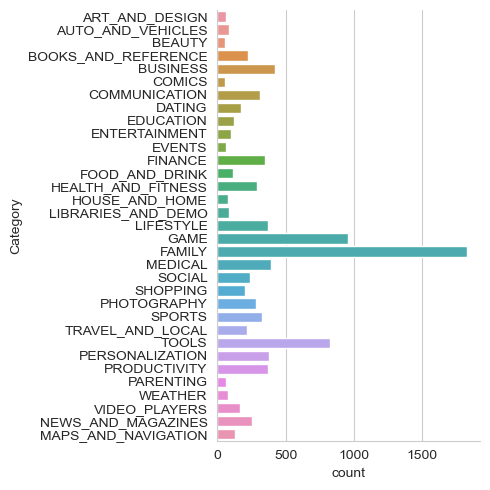

In [9]:
# Number of apps in each category

sns.set_palette('tab10')

sns.catplot(y='Category', data=apps, kind='count')


plt.show()

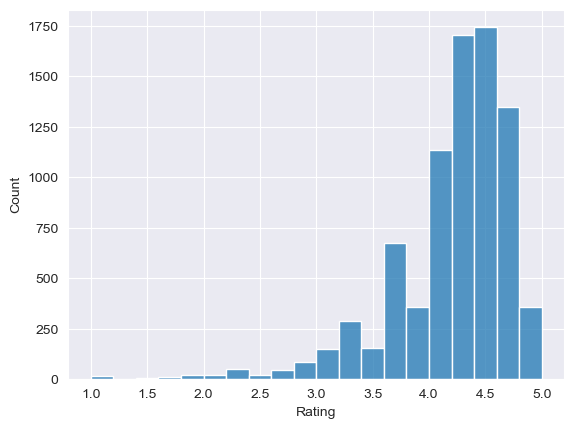

In [10]:
# Distribution plotting of Rating

sns.set_style('darkgrid')

sns.histplot(apps['Rating'], bins=20, kde=False)

plt.show()

## The top 10 free FINANCE apps having the highest average sentiment score

In [11]:
# 3

apps_finance = apps.loc[apps['Category'] == 'FINANCE', 'App']

top_10_user_feedback = (reviews
                        .query("App in @apps_finance")
                        .groupby('App')
                        .agg({'Sentiment Score':'mean'})
                        .sort_values(by='Sentiment Score', ascending=False)
                        .reset_index()
                        .iloc[:10]
                       )

top_10_user_feedback

,App,Sentiment Score
0,BBVA Spain,0.515086
1,Associated Credit Union Mobile,0.388093
2,BankMobile Vibe App,0.353455
3,A+ Mobile,0.329592
4,Current debit card and app made for teens,0.327258
5,BZWBK24 mobile,0.326883
6,"Even - organize your money, get paid early",0.283929
7,Credit Karma,0.270052
8,Fortune City - A Finance App,0.266966
9,Branch,0.264230


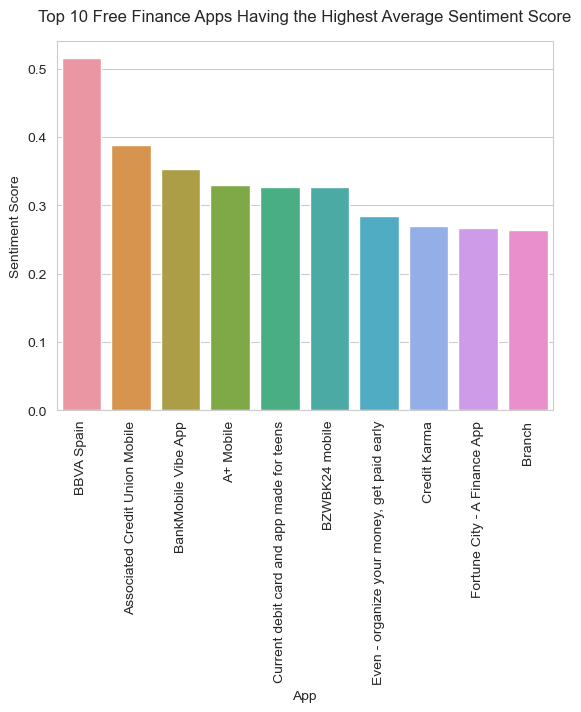

In [13]:
sns.set_style('whitegrid')
sns.set_palette('Set2')

g = sns.barplot(x='App', y='Sentiment Score', data=top_10_user_feedback)
g.set_title('Top 10 Free Finance Apps Having the Highest Average Sentiment Score', y=1.03)

plt.xticks(rotation=90)

plt.show()